# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Necessary Imports**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Setting Path**

In [ ]:
# Training Dataframe
training =  pd.read_csv("/content/drive/MyDrive/Datasets/twitter_training.csv")

# Testing Dataframe
testing = pd.read_csv("/content/drive/MyDrive/Datasets/twitter_validation.csv")

# **DATA UNDERSTANDING**

## **Training Dataframe**

In [ ]:
training

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


## **Testing Dataframe**

In [ ]:
testing

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### **Observation**
Currently there are no headers in the dataframe, so below we add them for readability.

# **DATA ANALYSIS**

## **Adding headers**

In [ ]:
# Adding four headers for four columns
testing.columns = ['Header1', 'Company','Labels','Text']
training.columns = ['Header1', 'Company','Labels','Text']

In [ ]:
print(training)
print("\n---------------------------------------------------------------------\n")
print(testing)

       Header1      Company    Labels  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                    Text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac wi

## **Removing unwanted columns**

In [ ]:
# Dropping unwanted columns from the original dataframe itself
training.drop(columns=["Header1","Company"],inplace=True)
testing.drop(columns=["Header1","Company"],inplace=True)

## **View Training**

In [ ]:
training.head()

,Labels,Text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


## **View Testing**

In [ ]:
testing.head()

,Labels,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## **View Training Info**

In [ ]:
# Get the type and counts for each attribute
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  74681 non-null  object
 1   Text    73995 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# **DATA CLEANING**

In [ ]:
# Check the missing values for all the attributes
training.isnull().sum()

Labels      0
Text      686
dtype: int64

In [ ]:
# Drop the missing values for all the attributes from the original dataframe
training.dropna(inplace=True)

In [ ]:
# Double Check if the problem is resolved
training.isnull().sum()

Labels    0
Text      0
dtype: int64

In [ ]:
# Check the number of duplicate values in the dataframe
training.duplicated().sum()

4227

In [ ]:
# Drop the duplicate values from the original dataframe
training.drop_duplicates(inplace=True)

In [ ]:
# Double Check if the problem is resolved
training.duplicated().sum()

0

## **Remove URLs**
In this step we will remove urls and replace it with space.

In [ ]:
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

In [ ]:
# Testing
link_text = "Click on this link to open FitGirl https://fitgirl-repacks.site/"
test_link_text = remove_urls(link_text)
test_link_text

'Click on this link to open FitGirl '

## **Remove Emojis**
In this step we will remove emojis and replace it with space.

In [ ]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  # scissors to black scissors
                           u"\U000024C2-\U0001F251"  # circled M to various other emojis and symbols
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [ ]:
# Testing
emoji_text = "Hello @fitgirl 👋🏾, still repacking games???  #FitGirlRocks #AllDayEveryDay #🍱"
test_emoji_text = remove_emoji(emoji_text)
test_emoji_text

'Hello @fitgirl  , still repacking games???  #FitGirlRocks #AllDayEveryDay # '

## **Remove Unwanted Characters**
In this step we will remove every unwanted characters it maybe user mentions, hashtags, punctuations, double spaces. Using .strip() we remove leading and trailing whitespace characters.

In [ ]:
def removeunwanted_characters(document):
  """
  This function will remove all the unwanted characters from the input dataset.
  Input Args:
  documet: A text data to be cleaned.
  Return:
  A cleaned document.
  """
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

In [ ]:
# Testing
test_string = removeunwanted_characters(test_emoji_text)
test_string

'Hello still repacking games'

## **Tokenization**
Here we will break down text or corpus into tokens.<br>
Example:<br>
Hi I am Nayan<br>
[' Hi ', ‘ I ', ' am ', ' Nayan ']

In [ ]:
# Testing
IN = 'YO!!! MAMA Is So NASTY,,, She Went SWIMMING And Made The DEAD SEA.!.!.!'
OUT = word_tokenize(IN)
OUT

['YO',
 '!',
 '!',
 '!',
 'MAMA',
 'Is',
 'So',
 'NASTY',
 ',',
 ',',
 ',',
 'She',
 'Went',
 'SWIMMING',
 'And',
 'Made',
 'The',
 'DEAD',
 'SEA.',
 '!',
 '.',
 '!',
 '.',
 '!']

## **Remove Punctuations**

Here we will remove punctuations from current text data.

In [ ]:
def remove_punct(text):
  """
  This function removes the punctutations present in our text data.
  Input Args:
  text: text data.
  Returns:
  text: cleaned text.
  """
  tokenizer = RegexpTokenizer(r"\w+")
  lst = tokenizer.tokenize(' '.join(text))
  return lst

In [ ]:
# Testing
no_punctutation = remove_punct(OUT)
no_punctutation

['YO',
 'MAMA',
 'Is',
 'So',
 'NASTY',
 'She',
 'Went',
 'SWIMMING',
 'And',
 'Made',
 'The',
 'DEAD',
 'SEA']

## **Remove StopWord**
Here we will remove connecting parts/words of a sentence. Example: Words like 'the' or 'and'. We can use stopword provided by NLTK library or also define our own words.

In [ ]:
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT',]
stop_words.update(custom_stopwords)

In [ ]:
def remove_stopwords(text_tokens):
  """
  This function removes all the stopwords present in out text tokens.
  Input Args:
  text_tokens: tokenize input of our datasets.
  Returns:
  result_tokens: list of token without stopword.
  """
  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

In [ ]:
# Testing
no_stopword = remove_stopwords(no_punctutation)
no_stopword

['YO',
 'MAMA',
 'Is',
 'So',
 'NASTY',
 'She',
 'Went',
 'SWIMMING',
 'And',
 'Made',
 'The',
 'DEAD',
 'SEA']

## **Lemmatization**
Here we will try to reduce the number of tokens by replacing the word with it's root word.<br>
Example:<br>
Playing, Played, Plays => Play

In [ ]:
def lemmatization(token_text):
  """
  This function performs the lemmatization operations as explained above.
  Input Args:
  token_text: list of tokens.
  Returns:
  lemmatized_tokens: list of lemmatized tokens.
  """
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens

In [ ]:
# Testing
lemmzatized_string = lemmatization(no_stopword)
lemmzatized_string

['YO',
 'MAMA',
 'Is',
 'So',
 'NASTY',
 'She',
 'Went',
 'SWIMMING',
 'And',
 'Made',
 'The',
 'DEAD',
 'SEA']

## **Stemming**
Here we will chop of the word at its tail to reduce token.<br>
Example:<br>
change, changing, changed => chang

In [ ]:
def stemming(text):
  """
  This function performs stemming operations.
  Input Args:
  token_text: list of tokenize text.
  Returns:
  stemm_tokes: list of stemmed tokens.
  """
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens

In [ ]:
# Testing
stemmed_string = stemming(lemmzatized_string)
stemmed_string

['yo',
 'mama',
 'is',
 'so',
 'nasti',
 'she',
 'went',
 'swim',
 'and',
 'made',
 'the',
 'dead',
 'sea']

### **NOTE**
Lemmatization and Stemming are both techniques to reduce tokens but lemmatization is considered more accurate as it considers context and grammatical structures of tokens. The result from stemming can be fast but the end result is not always a valid word.  


## **Lower Order**
In this we convert tokens to lowercase. Since we got the output in the form of list, we must map the lower_order function with each tokens and return it in list hence we used list(map(lower_order, stemmed_string)).

In [ ]:
def lower_order(text):
  """
  This function converts all the text in input text to lower order.
  Input Args:
  token_text : input text.
  Returns:
  small_order_text : text converted to small/lower order.
  """
  small_order_text = text.lower()
  return small_order_text

In [ ]:
# Testing
lower_order_string = list(map(lower_order, stemmed_string))
lower_order_string

['yo',
 'mama',
 'is',
 'so',
 'nasti',
 'she',
 'went',
 'swim',
 'and',
 'made',
 'the',
 'dead',
 'sea']

## **Input Text Pipeline**

Here we will compile every basic cleaning steps done above in one functions then tokenize and implement with our dataset.

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)
def text_cleaning_pipeline(dataset, rule="lemmatize"):
    """
    This function performs basic text cleaning steps including converting text to lowercase,
    removing URLs, emojis, unwanted characters, stopwords, and optionally lemmatizing or stemming tokens.
    """
    # Convert the input to lowercase
    data = dataset.lower()

    # Remove URLs
    data = remove_urls(data)

    # Remove emojis
    data = remove_emoji(data)

    # Remove all other unwanted characters
    data = removeunwanted_characters(data)

    # Create tokens
    tokens = tokenize_text(data)

    # Remove stopwords
    tokens = remove_stopwords(tokens)

    if rule == "lemmatize":
        tokens = lemmatization(tokens)
    elif rule == "stem":
        tokens = stemming(tokens)
    else:
        print("Pick between lemmatize or stem")

    return " ".join(tokens)

In [ ]:
# Get the first row of the dataframe
test = training["Text"][0]
test

'I am coming to the borders and I will kill you all,'

In [ ]:
# Test the Text Pipeline Function in it
text_cleaning_pipeline(test)

'come border kill'

In [ ]:
# Perform cleaning steps for the entire dataframe and then tokenize the texts and put it in a new attribute "Cleaned_Texts"
training['Cleaned_Text'] = training['Text'].apply(lambda dataset: text_cleaning_pipeline(dataset)).apply(lambda text: tokenize_text(text))

In [ ]:
training

,Labels,Text,Cleaned_Text
0,Positive,I am coming to the borders and I will kill you...,"[come, border, kill]"
1,Positive,im getting on borderlands and i will kill you ...,"[im, get, borderlands, kill]"
2,Positive,im coming on borderlands and i will murder you...,"[im, come, borderlands, murder]"
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, get, borderlands, 2, murder]"
4,Positive,im getting into borderlands and i can murder y...,"[im, get, borderlands, murder]"
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,"[realize, windows, partition, mac, like, 6, ye..."
74677,Positive,Just realized that my Mac window partition is ...,"[realize, mac, window, partition, 6, years, be..."
74678,Positive,Just realized the windows partition of my Mac ...,"[realize, windows, partition, mac, 6, years, b..."
74679,Positive,Just realized between the windows partition of...,"[realize, windows, partition, mac, like, 6, ye..."


## **Word Count Plot**
The plot of most frequent to less frequent word in the attribute 'Cleaned_Text'.

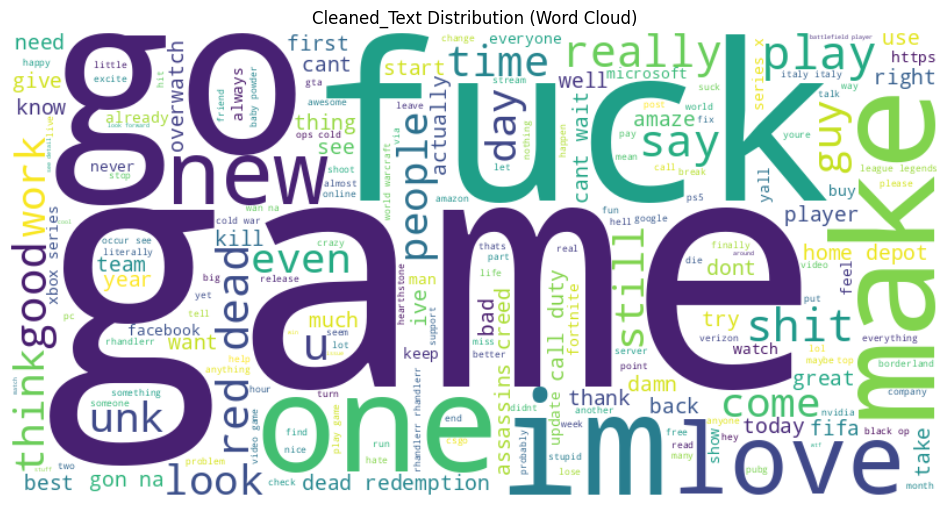

In [ ]:
# Concatenate the lists of words into a single string for each row using apply and join
cleaned_texts_as_string = training['Cleaned_Text'].apply(' '.join)

# Generate word cloud from the concatenated strings
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(' '.join(cleaned_texts_as_string))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cleaned_Text Distribution (Word Cloud)')
plt.show()

## **Copy of Dataframe**


In [ ]:
# Create a copy of dataframe
training_copy = training.copy()

In [ ]:
training_copy

,Labels,Text,Cleaned_Text
0,Positive,I am coming to the borders and I will kill you...,"[come, border, kill]"
1,Positive,im getting on borderlands and i will kill you ...,"[im, get, borderlands, kill]"
2,Positive,im coming on borderlands and i will murder you...,"[im, come, borderlands, murder]"
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, get, borderlands, 2, murder]"
4,Positive,im getting into borderlands and i can murder y...,"[im, get, borderlands, murder]"
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,"[realize, windows, partition, mac, like, 6, ye..."
74677,Positive,Just realized that my Mac window partition is ...,"[realize, mac, window, partition, 6, years, be..."
74678,Positive,Just realized the windows partition of my Mac ...,"[realize, windows, partition, mac, 6, years, b..."
74679,Positive,Just realized between the windows partition of...,"[realize, windows, partition, mac, like, 6, ye..."


In [ ]:
# Count the occurrences of each unique label in the dataframe
training_copy['Labels'].value_counts()

Labels
Negative      21237
Positive      19137
Neutral       17110
Irrelevant    12284
Name: count, dtype: int64

In [ ]:
# Drop Labels which are "Neutral" and "Irrelevant" from the dataframe
training_copy = training_copy[(training_copy['Labels'] != 'Neutral') & (training_copy['Labels'] != 'Irrelevant')]

### **NOTE**
Dropping the 'Neutral' and 'Irrelevant' sentiments as the goal is to only differentiate Positive and Negative tweets.

In [ ]:
# Recount occurrences of each unique label in the dataframe to see if the unwanted labels are dropped
training_copy['Labels'].value_counts()

Labels
Negative    21237
Positive    19137
Name: count, dtype: int64

## **Assign Variables**

In [ ]:
# Assign the values of 'Cleaned_Text' to the variable 'reviews' and store it as Numpy array
reviews = training_copy['Cleaned_Text'].values

# Assign the values of 'Labels' to the variable 'labels' and store it as Numpy array
labels = training_copy['Labels'].values

## **Label Encoder**
We use Label Encoder to convert categorical labels into numerical format.<br>Here,<br>
We first create an instance of LabelEncoder() and then use the fit_transform() method to the label data and transform the categorical labels into numerical format.<br>
Then we can see the numerical labels assigned by the LabelEncoder to the classes.

In [ ]:
# Encoding labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Print the unique classes and their corresponding numerical labels
print("Classes:", label_encoder.classes_)
print("Numerical Labels:", label_encoder.transform(label_encoder.classes_))

Classes: ['Negative' 'Positive']
Numerical Labels: [0 1]


## **Convert to Sequence**
Here we convert our text data into sequence of integers to feed to our neural network.<br>
First we speicfy the maximum number of unique words to keep in the vocabulary. Then we create an instance of Tokenizer() and specify that maximum number of words in it. Then, we fit the tokenizer to the text data. Finally, we convert the text data to sequence of integers.

In [ ]:
# Tokenization
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

# Convert text data to sequences of integers
X_seq = tokenizer.texts_to_sequences(reviews)

## **Padding**
We then use padding to make sure that every sequence are of equal length.<br>
Here the pad_sequence() ensures that all sequences have the same length  by either adding padding or truncating them at the end of sequences, depending on their original length vs the specified max_len.  

In [ ]:
# Padding sequences to ensure uniform length
max_len = 100
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

## **One-Hot Encoding**
Here we use One-Hot Encoding to represent categorical labels as binary vectors. In our case:<br>
For "negative": The one-hot encoding would be [1, 0].<br>
For "positive": The one-hot encoding would be [0, 1].


In [ ]:
# One-hot encode labels
y_one_hot = to_categorical(encoded_labels)

## **Splitting Dataset**
Here we use the train_test_split function to divide the dataset into training and testing sets in the ratio of 80:20, allowing the model to be trained on one portion of the data and evaluated on remaining for assessment.

In [ ]:
# Splitting the dataset with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_one_hot, test_size=0.2, stratify=encoded_labels, random_state=42)

# **MODEL BUILDING**

## **RNN based deep sequential model**
Here we aim to build an architecture which used RNN-based LSTM layers along with dense layers to build a deep sequential model.
1. Embedding Layer:<br>
    This layer converts input integer sequences into dense vectors of fixed size(embedding_dim = 100).
2. Dropout Layer:<br>
    This layer randomly drops a fraction of input units, helping prevent overfitting.
3. Bidirectional LSTM Layer:<br>
    This layer consists of two LSTM layers processing the input sequence in both forward and backward directions.
4. Dense Layer (ReLU):<br>
    This layer uses the ReLU activation function to add non-linearities to the model.
5. Dense Output Layer (Softmax):<br>
    This final layer produces the output predictions.

In [ ]:
# Define model architecture
model = Sequential()

# Add Embedding layer
embedding_dim = 100
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

# Add Dropout layer
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(150)))

# Add Dense layer with ReLU activation
model.add(Dense(32, activation='relu'))

# Add Dense output layer with softmax activation
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 dropout_3 (Dropout)         (None, 100, 100)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 300)               301200    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                9632      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2310898 (8.82 MB)
Trainable params: 2310898 (8.82 MB)
Non-trainable params: 0 (0.00 Byte)
________________

## **Model Compilation**
We set the learning rate in this step, it is a hyper parameter that controls the rate at which the model learns from the training data.<br>
We used Adam as the optimization algorithm to update the weights of the neural network during training.<br>
For the loss function we used categorical_crossentropy to measure the difference between the predicted distribution and the actual distribution of the target classes.<br>
Finally we used accuracy as the metrics, it measures the proportion of correctly classified instances out of the total number of instances.<br>
and complied the model.

In [ ]:
# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# **MODEL TRAINING**
Here we train our model for a specified number of epochs using the training data (X_train and y_train). It also evaluates the model's performance on the validation data (X_test and y_test) after each epoch.

In [ ]:
# Train the model
epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
1010/1010 [==============================] - 580s 567ms/step - loss: 0.5288 - accuracy: 0.7169 - val_loss: 0.3807 - val_accuracy: 0.8364
Epoch 2/5
1010/1010 [==============================] - 554s 548ms/step - loss: 0.3358 - accuracy: 0.8546 - val_loss: 0.2993 - val_accuracy: 0.8789
Epoch 3/5
1010/1010 [==============================] - 493s 489ms/step - loss: 0.2645 - accuracy: 0.8905 - val_loss: 0.2540 - val_accuracy: 0.8959
Epoch 4/5
1010/1010 [==============================] - 482s 478ms/step - loss: 0.2233 - accuracy: 0.9090 - val_loss: 0.2294 - val_accuracy: 0.9066
Epoch 5/5
1010/1010 [==============================] - 532s 527ms/step - loss: 0.1901 - accuracy: 0.9221 - val_loss: 0.2137 - val_accuracy: 0.9124


## **Training loss/Validation loss**


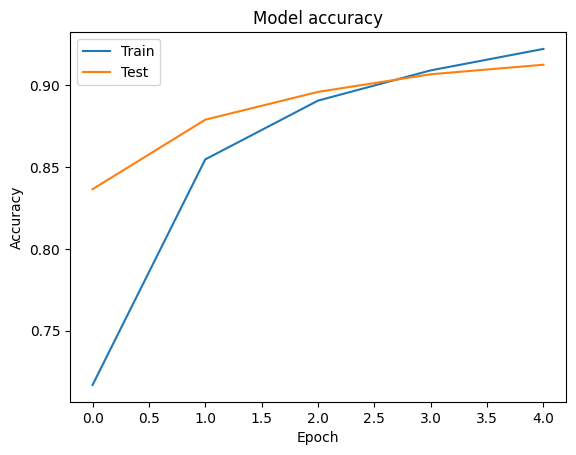

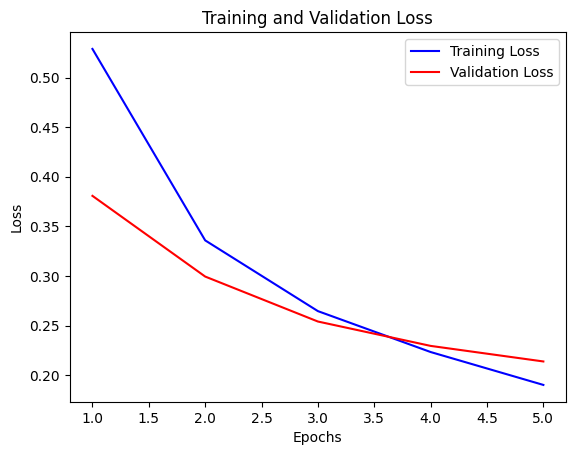

In [ ]:
# Display model's accuracy on both training and validation datasets over epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Display the training and validation loss over epochs.
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **MODEL EVALUATION**

## **Loss/Accuracy**

In [ ]:
# Evaluate the model on the test data and show loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

253/253 [==============================] - 33s 129ms/step - loss: 0.2137 - accuracy: 0.9124
Test Loss: 0.2137438952922821
Test Accuracy: 0.9124458432197571


## **Classification Report**


In [ ]:
# Predict labels for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

253/253 [==============================] - 37s 143ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4248
           1       0.91      0.91      0.91      3827

    accuracy                           0.91      8075
   macro avg       0.91      0.91      0.91      8075
weighted avg       0.91      0.91      0.91      8075



### **NOTE**
Negative: 0<br>
Positive: 1
- For class "0", the precision is 0.92, indicating that 92% of the predictions classified as "0" were correct.
- For class "1", the recall is 0.91, indicating that 91% of the actual "1" instances were correctly identified by the model.
- For class "0", the F1-score is 0.92, and for class "1", it is 0.91.
- For class "0", there are 4248 instances, and for class "1", there are 3827 instances.<br>
The overall accuracy of the model across all classes is 0.91, indicating that it correctly classified 91% of the instances in the test data.

## **Confusion Matrix**
We create a confusion matrix which summarizes the performance of a classification model by comparing actual class labels with predicted class labels.




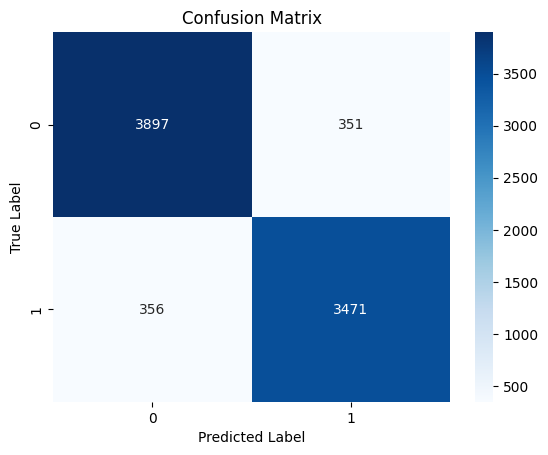

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **NOTE**
Negative: 0 and Positive: 1<br>
y: true label and x: predicted label<br>
-	True Positives (TP) (1,1): 3471; predicted positive, actual positive
-	True Negatives (TN) (0,0): 3897; predicted negative, actual negative
-	False Positives (FP) (1,0): 356; predicted positive, actual negative
-	False Negatives (FN) (0,1): 351; predicted negative, actual positive


# **MODEL PREDICTIONS**
Here we test our model with our validation dataframe.<br>
We first clean and preprocess our validation dataframe. Then we convert it into sequence and add padding. We then pass this to our sentiment model and convert the predictions to sentiment labels and compare. Then print the example predictions.

## **Train VS Test**

In [ ]:
# Validation dataframe
testing

,Labels,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Clean the text and created a new column 'Clean_Texts'
testing['Clean_Texts'] = testing['Text'].apply(lambda dataset: text_cleaning_pipeline(dataset))

# Vectorize and pad the preprocessed text data
testing_sequences = tokenizer.texts_to_sequences(testing['Clean_Texts'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='post', truncating='post')

# Predict sentiment for each tweet in the testing dataset
predictions = model.predict(testing_padded)

# Convert predictions to sentiment labels
predicted_sentiments = np.argmax(predictions, axis=1)

# Compare predicted sentiments with true labels
true_labels = testing['Labels']

# Loop and print 15 example predictions
for i, tweet in enumerate(testing['Clean_Texts'][:15]):
    print("Tweet:", tweet)
    print("Predicted Sentiment:", "positive" if predicted_sentiments[i] == 1 else "negative")
    print()

32/32 [==============================] - 3s 98ms/step
Tweet: bbc newsamazon boss jeff bezos reject claim company act like drug dealer bbccouknewsavbusine
Predicted Sentiment: negative

Tweet: pay word function poorly chromebook
Predicted Sentiment: negative

Tweet: csgo matchmaking full closet hack truly awful game
Predicted Sentiment: negative

Tweet: president slap americans face really commit unlawful act hisacquittal discover google vanityfaircomnews202002t
Predicted Sentiment: positive

Tweet: hi ive madeleine mccann cellar past 13 years little sneaky thing escape whilst load fifa point take card im use paypal account isnt work help resolve please
Predicted Sentiment: negative

Tweet: thank new te austin hooper orangebrownpictwittercomgrg4xzfkon
Predicted Sentiment: positive

Tweet: rocket league sea thieve rainbow six siege love play three stream best
Predicted Sentiment: positive

Tweet: ass still kneedeep assassins creed odyssey way anytime soon lmao
Predicted Sentiment: positi